<a href="https://colab.research.google.com/github/Lavkesh-kumar/ML-HOT-CLASS/blob/main/ML_parent_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
 #enabling gpu

import tensorflow as tf
device_name = tf.test.gpu_device_name()

if(device_name != '/device:GPU:0'):
    raise SystemError('GPU device not found')

print('Found GPU at: {}',format(device_name))

SystemError: ignored

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
class Ml_models:

    def __init__(self,alpha,epoch):
        self.alpha = alpha
        self.epoch = epoch

    ####################################################################################
    ##################              Linear Regression            #######################
    ####################################################################################

    def Linear_Regression(self,X,y,x_test,y_test):
        theta=np.zeros((21,))        
        cost_list=[]    
        m = X.shape[0]

        for i in range(self.epoch):
            h=np.dot(X,theta)           
            j=(1/(2*m))*np.sum(np.square(h-y))       
            d_theta=(1/m)*np.dot(X.T,h-y)            
            theta = theta - self.alpha * d_theta
            cost_list.append(j)   
            if(i%(self.epoch/5)==0):  
               print("cost is",j)
    
        #plot cost vs epoch Graph
        x1=np.arange(self.epoch);
        x2=cost_list
        plt.plot(x1,x2 ,c='r')
        plt.xlabel("number of iterations(epoch)",c='b',size=20)
        plt.ylabel("cost value",c='b',size=20)
        plt.grid()

        #Accuracy for linear regression model
        y_pred = np.dot(x_test,theta)

        count=0
        for i in range(x_test.shape[0]):
            if(np.abs(y_test[i]-y_pred[i])<=100):
                count+=1

        return (count/y_test.shape[0])*100


    ####################################################################################
    ##################              Logistic Regression          #######################
    ####################################################################################


    def logistic_Regression(self, X, Y,x_test,y_test):
        theta = np.zeros((X.shape[1], 26))
        costlist = []
        for i in range(self.epoch):
            z = np.dot(X, theta)
            y_pred = 1/(1+np.exp(-z))
            cost = (-1/X.shape[0]) * (np.sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred)))
            d_cost = (1/X.shape[0]) * np.dot(X.T, y_pred - Y) 
            theta = theta - self.alpha * d_cost
            costlist.append(cost)

            if(i%(self.epoch/20) == 0):
                print("The value of cost after", i, "iterations(epoch) is", cost )
                plt.scatter(i,cost)

            plt.xlabel("number of iterations(epoch)",c='b',size=20)
            plt.ylabel("cost value",c='b',size=20)
            plt.grid()

        #Accuracy for logistic regression model
        z_test = np.dot(x_test,theta)
        y_pred_=1/(1+np.exp(-z_test))
        y_test_pred = np.argmax(y_pred_, axis=1) + 1     

        count=0
        for i in range(x_test.shape[0]):
            if(y_test[i]==y_test_pred[i]):
                count+=1

        return (count/y_test.shape[0])*100


    ####################################################################################
    ####################              Neural Network             #######################
    ####################################################################################

        
    def init_params(self):
        hidden_laySize=int((x_train.shape[1])*2/3 + y_train.shape[1])
        weight_1 = np.random.rand(hidden_laySize, x_train.shape[1])-0.5
        bias_1 = np.random.rand(hidden_laySize, 1)-0.5
        weight_2 = np.random.rand(y_train.shape[1], hidden_laySize)-0.5
        bias_2 = np.random.rand(y_train.shape[1], 1)-0.5
        return weight_1, bias_1, weight_2, bias_2

    def activation_func(self,Z):
        return 1/(1 + np.exp(-Z))

    def forward_prop(self,weight_1, bias_1, weight_2, bias_2, X):
        Z1 = weight_1.dot(X.T) + bias_1
        A1 = self.activation_func(Z1)
        Z2 = weight_2.dot(A1) + bias_2
        A2 = self.activation_func(Z2)
        return Z1, A1, Z2, A2

    def cost(self,weight_1,weight_2,X,Y):
        m,n=X.shape
        a1=X
        a2=self.activation_func(a1@weight_1.T)
        #u=np.ones((m,1))
        #a2=np.concatenate((u,a2),axis=1)
        A=self.activation_func(a2@weight_2.T)
        J=  -((1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A)))
        return J

    def activation_deriv(self,z):
        g = np.zeros(z.shape)
        g = self.activation_func(z)*(1-self.activation_func(z))
        return g

    def backward_prop(self,Z1, A1, Z2, A2, weight_1, weight_2, X, Y):
        m = Y.shape[0]
        dZ2 = A2 - Y.T
        dW2 = (1 / m) * dZ2.dot(A1.T)
        db2 = (1 / m) * np.sum(dZ2)
        dZ1 = weight_2.T.dot(dZ2) * self.activation_deriv(Z1)
        dW1 = (1 / m) * dZ1.dot(X)
        db1 = (1 / m)* np.sum(dZ1)
        return dW1, db1, dW2, db2

    def update_params(self,weight_1, bias_1, weight_2, bias_2, dW1, db1, dW2, db2):
        weight_1 = weight_1 - self.alpha * dW1
        bias_1 = bias_1 - self.alpha * db1    
        weight_2 = weight_2 - self.alpha * dW2  
        bias_2 = bias_2 -self.alpha * db2    
        return weight_1, bias_1, weight_2, bias_2

    def Neural_network(self, X, Y,x_test, y_test):
        weight_1, bias_1, weight_2, bias_2 = self.init_params()
        for i in range(self.epoch+1):
            Z1, A1, Z2, A2 = self.forward_prop(weight_1, bias_1, weight_2, bias_2, X)
            dW1, db1, dW2, db2 = self.backward_prop(Z1, A1, Z2, A2, weight_1, weight_2, X, Y)
            weight_1, bias_1, weight_2, bias_2 = self.update_params(weight_1,bias_1,weight_2, bias_2, dW1, db1, dW2, db2)
            J=self.cost(weight_1,weight_2,X,Y)
            if i % 5 == 0:
                print("cost value in iteration: ", i ," is ",J)
        #return weight_1, bias_1, weight_2, bias_2


        #predicting Accuracy
        count = 0
        _, _, _, A2 = self.forward_prop(weight_1, bias_1, weight_2, bias_2, x_test)
        test_predictions = np.argmax(A2, 0)+1

        #return test_predictions

        for i in range(x_test.shape[0]):
            if(y_test[i] == test_predictions[i]):
                count+=1

        return (count/y_test.shape[0])*100


    
    ####################################################################################
    ##################             K NEAREST NEIGHBOR               ####################
    ####################################################################################

    def K_nearest_neighbor(self,x_train,x_test,y_test):
        y_pred=np.zeros((x_test.shape[0],1))
        wcss=[]

        for i in range(x_test.shape[0]):
            dist_xtrain_xtest = np.square(x_train-x_test[i])
            sum_dist = np.sum(dist_xtrain_xtest,axis=1)
            final_dist = np.sqrt(sum_dist)
            wcss.append(final_dist)
            sort_dist = np.argsort(final_dist)
            K_nearest_point = sort_dist[:3]
            count = np.zeros((26,1))
            for j in K_nearest_point:
                count[y_train[j]-1]+= 1
                max_value=np.argmax(count)
                y_pred[i]=max_value+1
                print(y_pred[i])
            
        count=0
        for i in range(x_test.shape[0]):
            if(y_test[i]==y_pred[i]):
                count+=1

        return y_pred,(count/y_test.shape[0])*100



In [11]:
ML_Models = Ml_models(0.734,800)

## ***illustrating linear regression model*** 

In [10]:
df_train=pd.read_csv("/content/drive/MyDrive/Data/Linear_train.csv",index_col=0) 
df_test=pd.read_csv("/content/drive/MyDrive/Data/Linear_test.csv",index_col=0)  

In [11]:
x_train = df_train.drop("label",axis=1)
y_train = df_train["label"]

x_test = df_test.drop("label",axis=1)
y_test = df_test["label"]

x_train.insert(0,'bias',np.ones(x_train.shape[0]))  
x_test.insert(0,'bias',np.ones(x_test.shape[0]))

x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

#for i in range(1,x_train.shape[1]):
    #print(np.mean(x_train[:,i]),"   ",np.std(x_train[:,i]))

for i in range(1,x_train.shape[1]):
    x_train[:,i] = (x_train[:,i] - np.mean(x_train[:,i]))/np.std(x_train[:,i])

for i in range(1,x_test.shape[1]):
    x_test[:,i] = (x_test[:,i] - np.mean(x_test[:,i]))/np.std(x_test[:,i])
    
#for i in range(1,x_train.shape[1]):
    #print(np.mean(x_train[:,i]),"   ",np.std(x_train[:,i]))

In [ ]:
#printing the shape of attributes 
print("x_train shape :",x_train.shape)
print("y_train shape :",y_train.shape)
print("x_test shape :",x_test.shape)
print("y_test shape :",y_test.shape)

x_train shape : (50000, 21)
y_train shape : (50000,)
x_test shape : (10000, 21)
y_test shape : (10000,)


cost is 13398388.663990432
cost is 1907.0986737789892
cost is 1907.0986737789892
cost is 1907.0986737789892
cost is 1907.0986737789892



Accuracy of Linear Regression Model : 88.94 




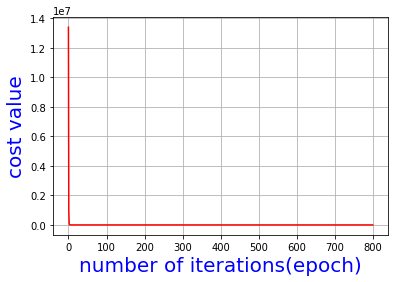

In [ ]:
accuracy = ML_Models.Linear_Regression(x_train,y_train,x_test,y_test)

print("\n\n\nAccuracy of Neural Network :",accuracy,"\n\n")

# ***illustraing logistic regression model on mnist dataset***

In [12]:
df_train=pd.read_csv("/content/drive/MyDrive/Data/emnist-letters-train.csv",header=None)
df_test = pd.read_csv("/content/drive/MyDrive/Data/emnist-letters-test.csv",header=None)

In [13]:
#getting outputs from dataframes
y_train = df_train.iloc[:,0]
y_test = df_test.iloc[:,0]

#one hot encoding for outputs columns
y_train=pd.get_dummies(y_train)
y_train=y_train.values

#converting into numpy
df_train = df_train.values
df_test = df_test.values

#separating inputs 
x_train = df_train[:,1:df_train.shape[1]]

x_test = df_test[:,1:df_test.shape[1]]

#normalizing the inputs
x_train = x_train/255
x_test = x_test/255

#adding bias terms to train and test data
x_bias=np.ones((df_train.shape[0],1))
x_train=np.hstack((x_bias,x_train))
x_bias=np.ones((df_test.shape[0],1))
x_test=np.hstack((x_bias,x_test))

In [ ]:
#printing the shape of attributes 
print("x_train shape :",x_train.shape)
print("y_train shape :",x_train[:,0].shape)
print("x_test shape :",x_test.shape)
print("y_test shape :",y_test.shape)

x_train shape : (88800, 785)
y_train shape : (88800,)
x_test shape : (14800, 785)
y_test shape : (14800,)


The value of cost after 0 iterations(epoch) is 18.021826694558612
The value of cost after 40 iterations(epoch) is 2.4450281705889703
The value of cost after 80 iterations(epoch) is 2.2670383366052795
The value of cost after 120 iterations(epoch) is 2.179916189062658
The value of cost after 160 iterations(epoch) is 2.1238559295429127
The value of cost after 200 iterations(epoch) is 2.083125923920655
The value of cost after 240 iterations(epoch) is 2.05144145351957
The value of cost after 280 iterations(epoch) is 2.025700094993208
The value of cost after 320 iterations(epoch) is 2.004154918790107
The value of cost after 360 iterations(epoch) is 1.985729002060003
The value of cost after 400 iterations(epoch) is 1.969712781692889
The value of cost after 440 iterations(epoch) is 1.955614210634126
The value of cost after 480 iterations(epoch) is 1.9430779508379494
The value of cost after 520 iterations(epoch) is 1.9318387991744215
The value of cost after 560 iterations(epoch) is 1.9216933679

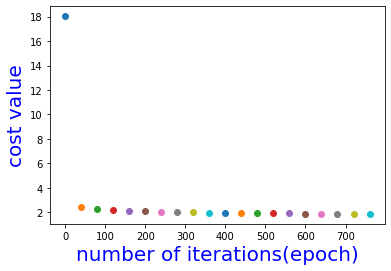

In [ ]:
accuracy = ML_Models.logistic_Regression(x_train,y_train,x_test,y_test)

print("\n\n\nAccuracy of logistic regression model :",accuracy,"\n\n")

# ***illustrating Neural Network on Mnist datasets***

In [ ]:
df_train =  pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [ ]:
#getting outputs from dataframes
y_train = df_train.iloc[:,0]
y_test = df_test.iloc[:,0]

#one hot encoding for outputs columns
y_train=pd.get_dummies(y_train)
y_train=y_train.values

#converting into numpy
df_train = df_train.values
df_test = df_test.values

#separating inputs 
x_train = df_train[:,1:df_train.shape[1]]

x_test = df_test[:,1:df_test.shape[1]]

#normalizing the inputs
x_train = x_train/255
x_test = x_test/255

In [ ]:
#printing the shape of attributes 
print("x_train shape :",x_train.shape)
print("y_train shape :",x_train[:,0].shape)
print("x_test shape :",x_test.shape)
print("y_test shape :",y_test.shape)

x_train shape : (88800, 784)
y_train shape : (88800,)
x_test shape : (14800, 784)
y_test shape : (14800,)


In [ ]:
accuracy = ML_Models.Neural_network(x_train, y_train , x_test, y_test)

print("\n\n\nAccuracy of Neural network model :",accuracy,"\n\n")

cost value in iteration:  0  is  58.78352496221314
cost value in iteration:  5  is  55.18890106393342
cost value in iteration:  10  is  54.82316481520002
cost value in iteration:  15  is  54.706926797892926
cost value in iteration:  20  is  54.617190933269974
cost value in iteration:  25  is  54.53561525689929
cost value in iteration:  30  is  54.45721962832529
cost value in iteration:  35  is  54.379041146303805
cost value in iteration:  40  is  54.299222339436206
cost value in iteration:  45  is  54.2164066192231
cost value in iteration:  50  is  54.12953876615679
cost value in iteration:  55  is  54.03801252236441
cost value in iteration:  60  is  53.94187281741696
cost value in iteration:  65  is  53.84181798499758
cost value in iteration:  70  is  53.73896727763296
cost value in iteration:  75  is  53.634562135606494
cost value in iteration:  80  is  53.52975894338925
cost value in iteration:  85  is  53.42553973115589
cost value in iteration:  90  is  53.32269449939759
cost value

# ***illustrating KNN on Mnist datasets***

In [14]:
df_train =  pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [15]:
#getting outputs from dataframes
y_train = df_train.iloc[:,0]
y_test = df_test.iloc[:,0]

y_train=y_train.values
y_test = y_test.values

#converting into numpy
df_train = df_train.values
df_test = df_test.values

#separating inputs 
x_train = df_train[:,1:df_train.shape[1]]

x_test = df_test[:,1:df_test.shape[1]]

#normalizing the inputs
x_train = x_train/255
x_test = x_test/255

x_test = x_test[:10000,:]
y_test = y_test[:10000,]

In [16]:
#printing the shape of attributes 
print("x_train shape :",x_train.shape)
print("y_train shape :",x_train[:,0].shape)
print("x_test shape :",x_test.shape)
print("y_test shape :",y_test.shape)

x_train shape : (88800, 784)
y_train shape : (88800,)
x_test shape : (10000, 784)
y_test shape : (10000,)


In [17]:
y_pred,accuracy = ML_Models.K_nearest_neighbor(x_train,x_test,y_test)

print("\n\n\nAccuracy of k nearest neibhbor model :",accuracy,"\n\n")

Streaming output truncated to the last 5000 lines.
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[24.]
[8.]
[8.]
[11.]
[11.]
[11.]
[26.]
[26.]
[26.]
[24.]
[16.]
[1.]
[11.]
[11.]
[11.]
[24.]
[24.]
[24.]
[8.]
[8.]
[8.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[24.]
[11.]
[5.]
[3.]
[1.]
[1.]
[1.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[8.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[12.]
[9.]
[8.]
[21.]
[21.]
[21.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[8.]
[8.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[9.]
[8.]
[9.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[3.]
[3.]
[12.]
[12.]
[12.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.]
[11.

In [19]:
y_test = y_test.reshape(y_test.shape[0],1)

l = np.hstack((y_test, y_pred))

result = pd.DataFrame(l, columns = ["Actual", "Predicted"])

print(result)

      Actual  Predicted
0        1.0        1.0
1        1.0        1.0
2        1.0        1.0
3        1.0       15.0
4        1.0        1.0
...      ...        ...
9995    13.0       13.0
9996    13.0       13.0
9997    13.0       13.0
9998    13.0       13.0
9999    13.0       13.0

[10000 rows x 2 columns]


In [20]:
from sklearn.metrics import accuracy_score

#print ("Accuracy of the model is: ", accuracy_score(y_pred, y_train))
print ("Accuracy of the model is:", accuracy_score(y_pred, y_test)*100, "%")

Accuracy of the model is: 82.8 %
